In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
test_df1 = df.copy()
test_df2 = df.copy()
test_df3 = df.copy()

In [3]:
df_dropped_cols = df.copy()

In [4]:
test_df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# We are converting all the Nulls with the the '0', or 'NO', or 'NONE' of their respective columns because they are 
# overwhelmingly the most common value, so we think it's a safe assumption.

df['waterfront'] = df['waterfront'].fillna('NO')
df['yr_renovated'].fillna(0.0, inplace=True)
df['view'].fillna('NONE', inplace=True)

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Let's convert all the object types to int or float so we can put them in a linear regression.

In [7]:
# Take apart the date column, put it in to three columns as day month and year and have the values numeric.
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
df.drop('date', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [9]:
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [10]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [11]:
df['view'].value_counts()

NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [13]:
# We simply convert the yes or no values to 1 and 0 respectively.
waterfront = preprocessing.LabelEncoder()
x1 = list(df['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df['waterfront'] = waterfront_list
df['waterfront'].value_counts()


# 0 is NO WATERFRONT
# 1 is YES WATERFRONT

0    21451
1      146
Name: waterfront, dtype: int64

In [14]:
# Now replace the view condition and grade score with a numerical score
df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)

df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)


In [15]:
# # Here we turn each unique value into a column and the column will have a 1 or 0 in it
# # to say if that column is true for that house.
# view = OneHotEncoder(sparse=False, handle_unknown='ignore')
# x2 = df[['view']]
# view.fit(x2)
# view.transform(x2)
# view_array = view.transform(x2)
# view_panda = pd.DataFrame(view_array, columns=('View_Average', 'View_Excellent', 'View_Fair', 'View_Good', 'View_None'), index=df.index)
# df = pd.concat([df, view_panda], axis=1)


In [16]:
df['condition'].value_counts()

3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

In [17]:
# Convert all the ? values to 0.0 like we did for the other columns.
# Then convert the values from strings to int

df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [18]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

We now have zero missing values and everything is int or float.
We can start working on our base model.

In [20]:
#plt.figure(figsize=(16, 10))
#sns.heatmap(data=df.corr(), annot=True)

In [21]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)

In [22]:
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_train, y_train)

0.0

In [23]:
baseline.score(X_test, y_test)

-0.0002252015545449737

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Regression score for training:', lr.score(X_train, y_train))
print('Regression score for test:', lr.score(X_test, y_test))

Regression score for training: 0.7069985738787832
Regression score for test: 0.6866354619291462


In [25]:
actual = y_test
predicted = lr.predict(X_test)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print('Our root mean squared error is:', rmse)

Our root mean squared error is: 218509.39668219484


In [26]:
X_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_sold,month_sold,year_sold
7152,7201600190,4,1.75,1570,7650,1.0,0,0,3,7,...,1975,0.0,98052,47.6801,-122.106,1580,7650,20,2,2015
8823,2558600100,4,2.00,2100,12620,1.0,0,0,4,7,...,1972,0.0,98034,47.7239,-122.173,1720,7840,27,8,2014
11039,8849300320,3,1.75,1330,12618,1.0,0,3,3,7,...,1983,0.0,98188,47.4403,-122.271,1870,8429,16,4,2015
17557,3751606514,2,1.00,1780,81021,1.0,0,3,4,9,...,1954,0.0,98001,47.2712,-122.265,1780,26723,26,6,2014
16607,2607720440,3,2.50,1980,9725,2.0,0,0,3,8,...,1994,0.0,98045,47.4856,-121.802,2070,9834,4,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,8001450170,3,1.75,1840,16679,1.0,0,0,3,8,...,1989,0.0,98001,47.3207,-122.275,1910,15571,4,8,2014
79,1531000030,4,2.50,3450,39683,2.0,0,0,3,10,...,2002,0.0,98010,47.3420,-122.025,3350,39750,23,3,2015
12119,1042500013,3,1.50,1650,9936,1.0,0,0,3,7,...,1967,0.0,98003,47.3285,-122.328,1560,9890,20,5,2014
14147,5153200666,3,2.25,1900,18000,1.0,0,0,4,7,...,1968,0.0,98023,47.3251,-122.354,1920,15000,14,1,2015


In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

train_df = pd.concat((X_train,y_train), axis=1)
outcome = 'price'
predictors = X_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_with_all = ols(formula=formula, data=train_df).fit()
model_with_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1774.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:10:43   Log-Likelihood:            -2.2023e+05
No. Observations:               16197   AIC:                         4.405e+05
Df Residuals:                   16174   BIC:                         4.407e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.436e+07   1.12e+07     -4.873      0.000   -7.62e+07   -3.25e+07
id            -1.232e-06    5.4e-07     -2.282      0.022   -2.29e-06   -1.74e-07
bedrooms      -3.224e+04   2105.530    -15.313      0.000   -3.64e+04   -2.81e+04
bathrooms      4.258e+04   3630.699     11.728      0.000    3.55e+04    4.97e+04
sqft_living     104.1865     21.006      4.960      0.000      63.012     145.361
sqft_lot          0.0759      0.051      1.480      0.139      -0.025       0.176
floors         1.053e+04   4023.281      2.616      0.009    2640.414    1.84e+04
waterfront     6.338e+05   2.02e+04     31.399      0.000    5.94e+05    6.73e+05
view           5.056e+04   2368.323     21.350      0.000    4.59e+04    5.52e+04
condition      2.817e+04   2616.679     10.765      0.000     2.3e+04    3.33e+04
grade           9.87e+04   2417.476     40.826      0.000     9.4e+04    1.03e+05
sqft_above       61.1136     20.970      2.914      0.004      20.011     102.217
sqft_basement    41.6906     20.784      2.006      0.045       0.952      82.429
yr_built      -2588.7602     80.456    -32.176      0.000   -2746.464   -2431.057
yr_renovated     13.8785      4.436      3.129      0.002       5.183      22.574
zipcode        -582.7555     36.860    -15.810      0.000    -655.005    -510.506
lat            5.961e+05    1.2e+04     49.525      0.000    5.73e+05     6.2e+05
long          -2.107e+05   1.47e+04    -14.307      0.000    -2.4e+05   -1.82e+05
sqft_living15    27.9995      3.859      7.257      0.000      20.436      35.563
sqft_lot15       -0.3214      0.080     -4.008      0.000      -0.479      -0.164
day_sold       -459.3408    177.803     -2.583      0.010    -807.855    -110.827
month_sold      333.9327    793.830      0.421      0.674   -1222.062    1889.927
year_sold      3.068e+04   5277.194      5.814      0.000    2.03e+04     4.1e+04
==============================================================================
Omnibus:                    11208.806   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           472249.077
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      28.849   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So we now have a model that simply uses all the information we have.
As expected, it is not great. It has a decent R-squared score but the error is massive.
Let's start trying to engineer the data to better satisfy our assumptions.

Let's first check what our target value looks like.

<AxesSubplot:ylabel='Frequency'>

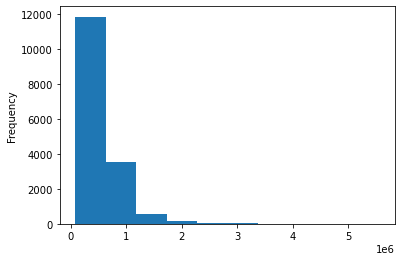

In [28]:
y_train.plot.hist()

Disgusting.

Log that shit.

<AxesSubplot:ylabel='Frequency'>

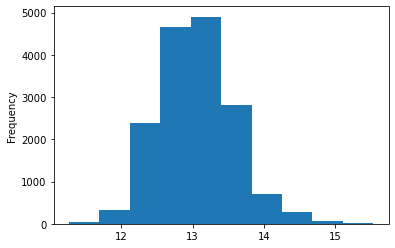

In [29]:
log_y_train = np.log(y_train)
log_y_train.plot.hist()

That's better. Check the model again.

In [30]:
# first add the new log price column
new_df = pd.concat((X_train, log_y_train), axis=1)
new_df.rename(columns={'price': 'log_price'}, inplace=True)
new_df['real_price'] = y_train

In [31]:
outcome = 'log_price'
predictors = X_train
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_with_all = ols(formula=formula, data=new_df).fit()
model_with_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     2466.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        18:10:49   Log-Likelihood:                -655.46
No. Observations:               16197   AIC:                             1357.
Df Residuals:                   16174   BIC:                             1534.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -121.0720     14.449     -8.379      0.000    -149.393     -92.750
id             6.837e-13   6.99e-13      0.978      0.328   -6.87e-13    2.05e-12
bedrooms         -0.0142      0.003     -5.207      0.000      -0.020      -0.009
bathrooms         0.0720      0.005     15.314      0.000       0.063       0.081
sqft_living       0.0002   2.72e-05      5.553      0.000    9.78e-05       0.000
sqft_lot       4.005e-07   6.64e-08      6.029      0.000     2.7e-07    5.31e-07
floors            0.0744      0.005     14.278      0.000       0.064       0.085
waterfront        0.3894      0.026     14.893      0.000       0.338       0.441
view              0.0602      0.003     19.625      0.000       0.054       0.066
condition         0.0662      0.003     19.525      0.000       0.060       0.073
grade             0.1606      0.003     51.302      0.000       0.155       0.167
sqft_above    -1.398e-05   2.72e-05     -0.515      0.607   -6.72e-05    3.93e-05
sqft_basement  2.889e-06   2.69e-05      0.107      0.915   -4.99e-05    5.57e-05
yr_built         -0.0034      0.000    -32.882      0.000      -0.004      -0.003
yr_renovated   3.537e-05   5.75e-06      6.156      0.000    2.41e-05    4.66e-05
zipcode          -0.0007   4.77e-05    -13.984      0.000      -0.001      -0.001
lat               1.3974      0.016     89.624      0.000       1.367       1.428
long             -0.1678      0.019     -8.796      0.000      -0.205      -0.130
sqft_living15  9.605e-05      5e-06     19.217      0.000    8.62e-05       0.000
sqft_lot15     -1.72e-07   1.04e-07     -1.656      0.098   -3.76e-07    3.16e-08
day_sold         -0.0007      0.000     -2.979      0.003      -0.001      -0.000
month_sold        0.0015      0.001      1.484      0.138      -0.000       0.004
year_sold         0.0582      0.007      8.513      0.000       0.045       0.072
==============================================================================
Omnibus:                      306.625   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              616.041
Skew:                          -0.081   Prob(JB):                    1.69e-134
Kurtosis:                       3.942   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
lr = LinearRegression()
lr.fit(X_train, log_y_train)
print('Regression score for training:', lr.score(X_train, log_y_train))
print('Regression score for test:', lr.score(X_test, np.log(y_test)))


# error = lr.predict(X_train)-y_train
# sq_of_err=(error)**2
# mean_sqr_of_errors=sq_of_err.mean()
# print('Our mean squared error is:',  mean_sqr_of_errors)
# sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
# print('Our root mean squared error is:', sqr_mean_sqr_errors)


actual = np.log(y_test)
predicted = lr.predict(X_test)

mse = mean_squared_error(actual, predicted)

rmse = np.sqrt(mse)

print('Our root mean squared error is:', rmse)

Regression score for training: 0.7703064734196428
Regression score for test: 0.7785116684357793
Our root mean squared error is: 0.24884656798050386


We improved a little bit but not much.
Let's start thinking about which columns we should use.
We'll first check for linearity.

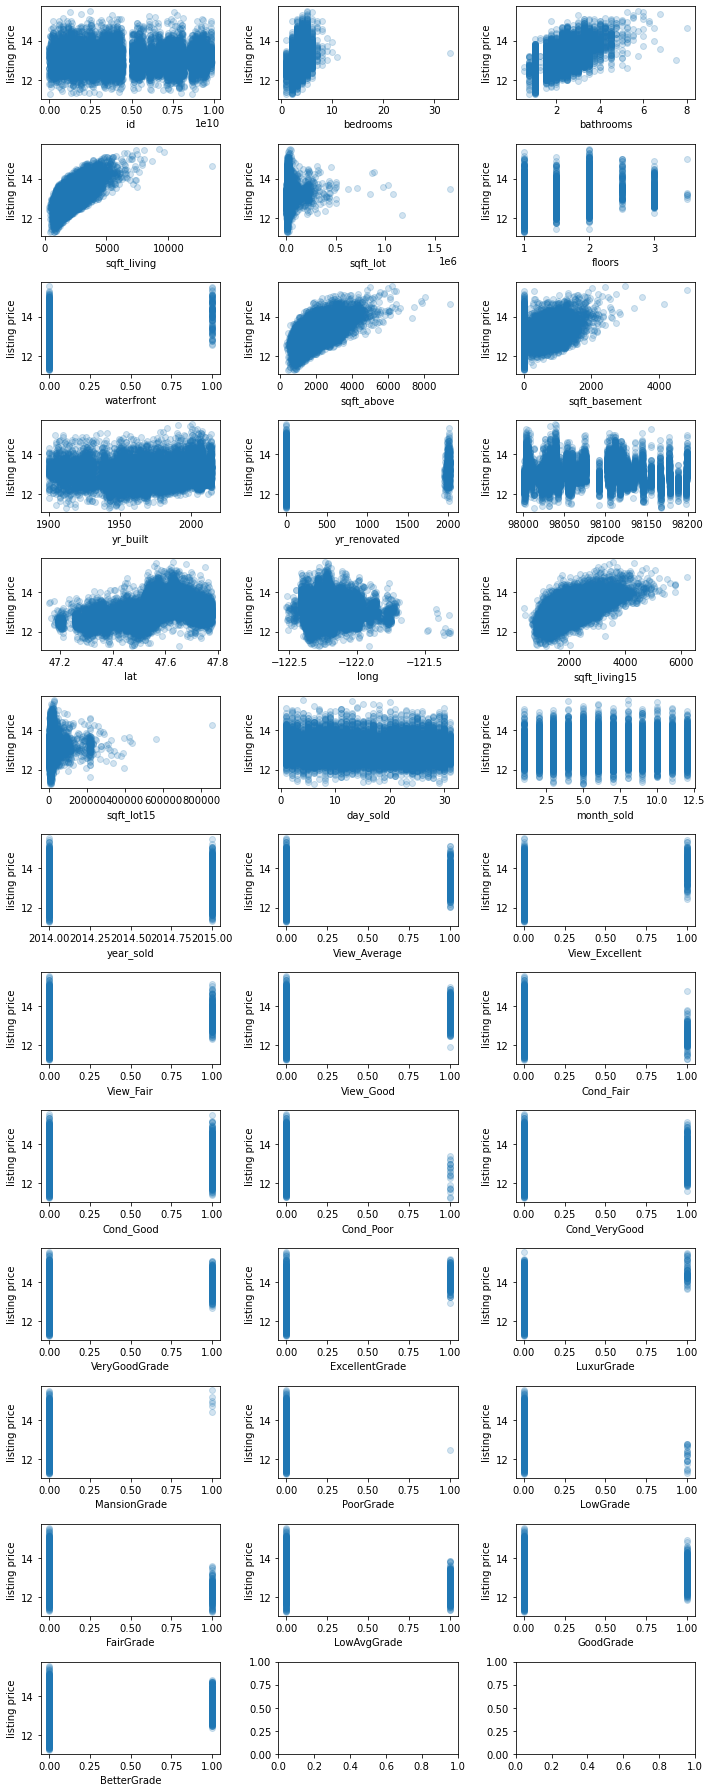

In [178]:
fig, axes = plt.subplots(ncols=3, nrows=13, figsize=(10, 25))
fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], log_y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

In [179]:
kc_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
kc_corrs

price             1.000000
sqft_living       0.701917
sqft_above        0.605368
sqft_living15     0.585241
bathrooms         0.525906
ExcellentGrade    0.357589
VeryGoodGrade     0.340944
sqft_basement     0.321108
bedrooms          0.308787
lat               0.306692
View_Excellent    0.303059
LuxurGrade        0.291068
waterfront        0.264306
floors            0.256804
BetterGrade       0.235859
MansionGrade      0.211806
LowAvgGrade       0.209463
View_Good         0.182932
View_Average      0.147179
yr_renovated      0.117855
View_Fair         0.092597
sqft_lot          0.089876
FairGrade         0.084549
sqft_lot15        0.082845
Cond_VeryGood     0.057531
yr_built          0.053953
zipcode           0.053402
Cond_Fair         0.051432
LowGrade          0.031618
Cond_Good         0.030759
long              0.022036
Cond_Poor         0.019886
id                0.016772
day_sold          0.014684
month_sold        0.009928
PoorGrade         0.005155
GoodGrade         0.004576
y

In [180]:
test_df1['waterfront'] = df['waterfront'].fillna('NO')
test_df1['yr_renovated'].fillna(0.0, inplace=True)
test_df1['view'].fillna('NONE', inplace=True)


test_df1['date'] = pd.to_datetime(test_df1['date'])
test_df1['day_sold'] = test_df1['date'].map(lambda x: x.day)
test_df1['month_sold'] = test_df1['date'].map(lambda x: x.month)
test_df1['year_sold'] = test_df1['date'].map(lambda x: x.year)
test_df1.drop('date', axis=1, inplace=True)

In [181]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [183]:
test_df1.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

In [184]:
test_df1.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

test_df1.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5},inplace=True)

test_df1.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [185]:
test_df1.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [186]:
test_df1['sqft_basement'] = test_df1["sqft_basement"].replace({"?": '0.0'})
test_df1['sqft_basement'] = test_df1['sqft_basement'].astype(float)

In [187]:
test_df1['log_price'] = np.log(test_df1['price'])


In [188]:
test_df1.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
log_price        0.891745
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
condition        0.036056
long             0.022036
id               0.016772
day_sold         0.014684
month_sold       0.009928
year_sold        0.003727
Name: price, dtype: float64

In [189]:
test_df1['grade']

0        7
1        7
2        6
3        7
4        8
        ..
21592    8
21593    8
21594    7
21595    8
21596    7
Name: grade, Length: 21597, dtype: int64

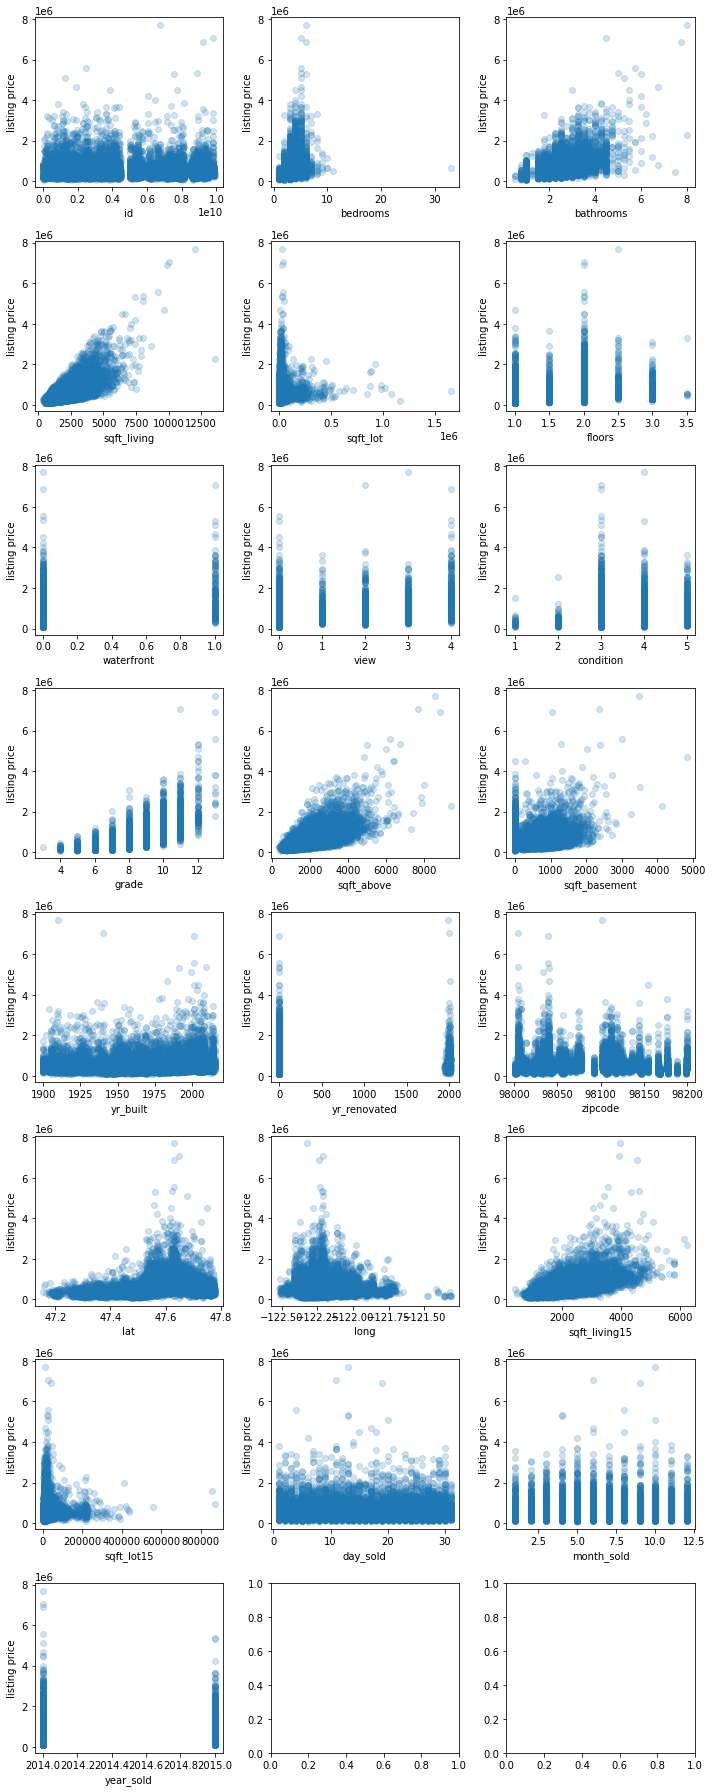

In [190]:
fig, axes = plt.subplots(ncols=3, nrows=8, figsize=(10, 25))
fig.set_tight_layout(True)

for index, col in enumerate(test_df1.drop(['price', 'log_price'],axis=1).columns):
    ax = axes[index//3][index%3]
    ax.scatter(test_df1.drop(['price', 'log_price'],axis=1)[col], test_df1['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")

We see that the only linear variables are the sqft variables and, bedrooms, bathrooms and grade. 
Let's make a model out of those.

In [141]:
pred= test_df1.drop(['log_price', 'price'], axis=1)
target = test_df1['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(pred,target, random_state=100)

KeyError: "['log_price'] not found in axis"

In [100]:
X_test2

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_sold,month_sold,year_sold
7189,1959702045,2,1.00,1240,5500,1.0,0,0,3,7,...,1954,0.0,98102,47.6461,-122.317,2080,4400,19,11,2014
2751,5104530240,3,2.50,2040,4348,2.0,0,0,4,8,...,2006,0.0,98038,47.3517,-121.999,2380,4348,24,7,2014
17077,4343800080,2,1.00,860,7250,1.0,0,0,3,6,...,1949,0.0,98133,47.7206,-122.350,1270,7250,18,8,2014
15151,3034200660,3,2.50,2120,7201,2.0,0,0,3,8,...,2003,0.0,98133,47.7174,-122.337,1930,7206,19,6,2014
985,2571910160,4,2.75,2130,8560,1.0,0,0,3,7,...,1992,0.0,98022,47.1949,-122.010,2130,8560,1,10,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,2523039282,2,1.00,1420,21158,1.0,0,0,3,7,...,1953,0.0,98166,47.4594,-122.359,1220,8625,21,11,2014
15694,3250500103,3,1.75,1610,10796,1.0,0,0,3,7,...,1951,0.0,98004,47.6272,-122.208,1940,10796,8,4,2015
15824,7436300170,2,2.50,1590,2088,2.0,0,0,3,9,...,1997,0.0,98033,47.6897,-122.175,2320,3174,28,7,2014
8820,8833510230,4,2.50,4060,9734,1.0,0,4,3,9,...,1977,0.0,98028,47.7678,-122.254,2750,10370,4,6,2014


In [51]:
X_train2

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_sold,month_sold,year_sold
7152,7201600190,4,1.75,1570,7650,1.0,0,0,3,7,...,1975,0.0,98052,47.6801,-122.106,1580,7650,20,2,2015
8823,2558600100,4,2.00,2100,12620,1.0,0,0,4,7,...,1972,0.0,98034,47.7239,-122.173,1720,7840,27,8,2014
11039,8849300320,3,1.75,1330,12618,1.0,0,3,3,7,...,1983,0.0,98188,47.4403,-122.271,1870,8429,16,4,2015
17557,3751606514,2,1.00,1780,81021,1.0,0,3,4,9,...,1954,0.0,98001,47.2712,-122.265,1780,26723,26,6,2014
16607,2607720440,3,2.50,1980,9725,2.0,0,0,3,8,...,1994,0.0,98045,47.4856,-121.802,2070,9834,4,3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,8001450170,3,1.75,1840,16679,1.0,0,0,3,8,...,1989,0.0,98001,47.3207,-122.275,1910,15571,4,8,2014
79,1531000030,4,2.50,3450,39683,2.0,0,0,3,10,...,2002,0.0,98010,47.3420,-122.025,3350,39750,23,3,2015
12119,1042500013,3,1.50,1650,9936,1.0,0,0,3,7,...,1967,0.0,98003,47.3285,-122.328,1560,9890,20,5,2014
14147,5153200666,3,2.25,1900,18000,1.0,0,0,4,7,...,1968,0.0,98023,47.3251,-122.354,1920,15000,14,1,2015


In [140]:
lr = LinearRegression()
X = X_train2[['sqft_living', 'bedrooms', 'bathrooms', 'grade']]
y = np.log(y_train2)
lr.fit(X, y)
print('Regression score for training:', lr.score(X, y))
print('Regression score for test:', lr.score(X_test2[['sqft_living', 'bedrooms', 'bathrooms', 'grade']], np.log(y_test2)))


error = lr.predict(X_test2) - y_test2
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print('Our mean squared error is:',  mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print('Our root mean squared error is:', sqr_mean_sqr_errors)




# lr_3=LinearRegression()
# lr_3.fit(X_train_scaled,y_train_normalized)
# y_test_pred6=lr_3.predict(X_test_scaled)
# error=y_test_pred6-y_test_normalized
# sq_of_err=(error)**2
# mean_sqr_of_errors=sq_of_err.mean()
# print(mean_sqr_of_errors)
# sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
# print(sqr_mean_sqr_errors)

# actual = y_test2
# predicted = lr.predict(X_test2)
# mse = mean_squared_error(actual, predicted)
# rmse = np.sqrt(mse)
# print('Our root mean squared error is:', rmse)

Regression score for training: 0.5564430785397569
Regression score for test: 0.5551337788809431


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 22)

In [53]:
outcome = 'log_price'
predictors = X_train2[['sqft_living', 'bedrooms', 'bathrooms', 'grade']]
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_with_linear_variables = ols(formula=formula, data=test_df1).fit()
model_with_linear_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     6766.
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:29:48   Log-Likelihood:                -8018.7
No. Observations:               21597   AIC:                         1.605e+04
Df Residuals:                   21592   BIC:                         1.609e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.2289      0.021    530.667      0.000      11.187      11.270
sqft_living     0.0002   5.08e-06     46.870      0.000       0.000       0.000
bedrooms       -0.0190      0.003     -5.839      0.000      -0.025      -0.013
bathrooms      -0.0134      0.005     -2.713      0.007      -0.023      -0.004
grade           0.1850      0.003     56.344      0.000       0.179       0.191
==============================================================================
Omnibus:                       47.035   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.876
Skew:                           0.107   Prob(JB):                     6.62e-11
Kurtosis:                       2.921   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

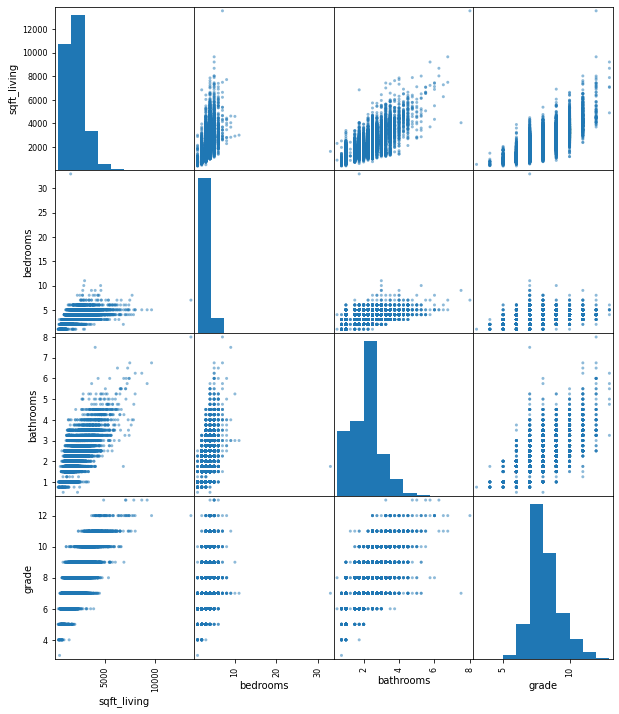

In [54]:
pd.plotting.scatter_matrix(X_train2[['sqft_living', 'bedrooms', 'bathrooms', 'grade']], figsize=(10,12));

In [55]:
# non_normal = ['sqft_living', 'bedrooms', 'bathrooms', 'grade']
# for feat in non_normal:
#     X_train2[feat] = X_train2[feat].map(lambda x: np.log(x))
# pd.plotting.scatter_matrix(X_train2[['sqft_living', 'bedrooms', 'bathrooms', 'grade']], figsize=(10,12));

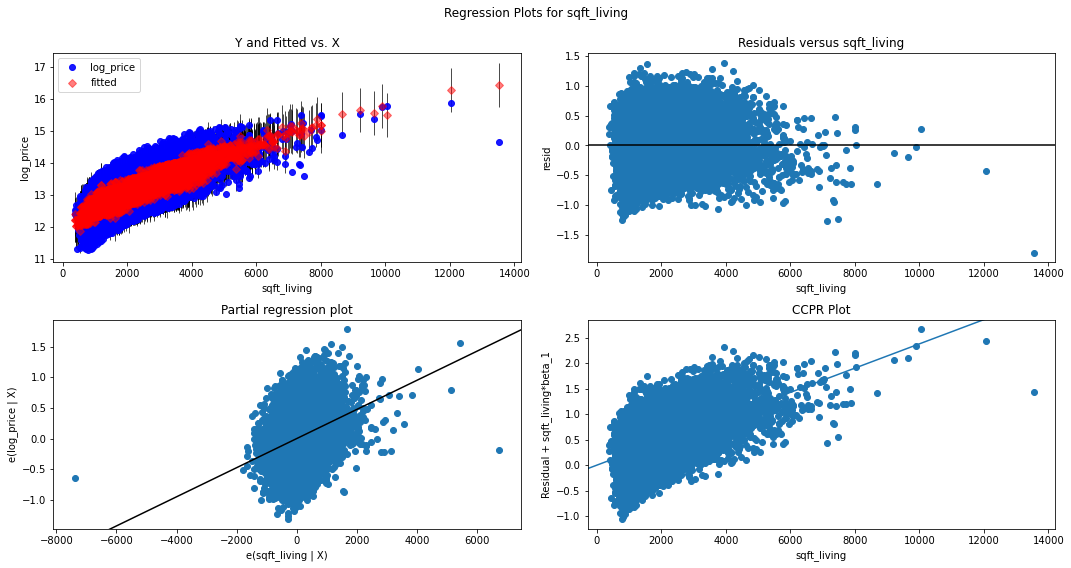

In [56]:
#Try and visualize errors of best model
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "sqft_living", fig=fig)
plt.show()

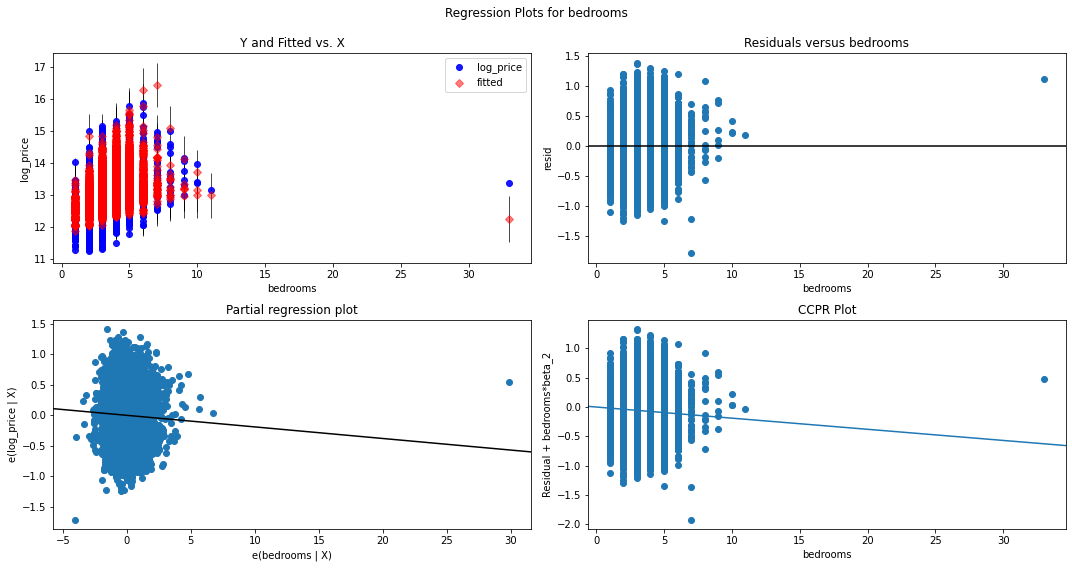

In [57]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "bedrooms", fig=fig)
plt.show()

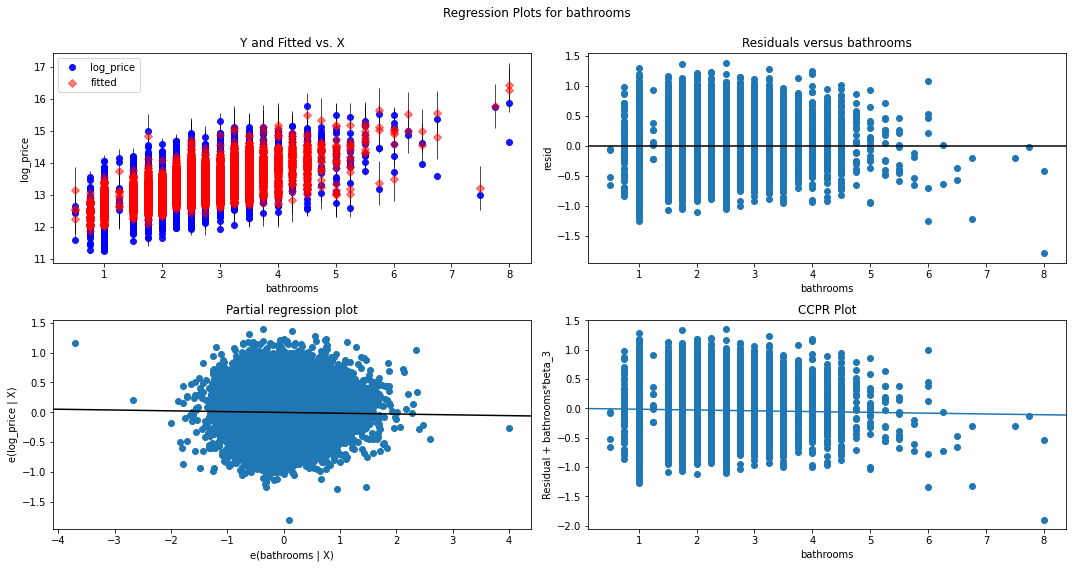

In [58]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_with_linear_variables, "bathrooms", fig=fig)
plt.show()

In [59]:
outcome = 'log_price'
predictors = X_train2[['sqft_living']]
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_with_linear_variables = ols(formula=formula, data=test_df1).fit()
model_with_linear_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        15:29:56   Log-Likelihood:                -9662.2
No. Observations:               21597   AIC:                         1.933e+04
Df Residuals:                   21595   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.2188      0.006   1915.383      0.000      12.206      12.231
sqft_living     0.0004   2.81e-06    142.118      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.541   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.562
Skew:                           0.028   Prob(JB):                        0.169
Kurtosis:                       2.973   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
lr = LinearRegression()
sqft = X_train2[['sqft_living']]
y = np.log(y_train2)
lr.fit(X, y)
print('Regression score for training:', lr.score(sqft, y))
print('Regression score for test:', lr.score(X_test2[['sqft_living']], np.log(y_test2)))


# sqft_err = lr.predict(sqft)-y_train2
# sqft_sq_of_err=(error)**2
# mean_sqr_of_errors=sq_of_err.mean()
# print('Our mean squared error is:',  mean_sqr_of_errors)
# sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
# print('Our root mean squared error is:', sqr_mean_sqr_errors)


actual = y_test2
predicted = lr.predict(X_test2)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print('Our root mean squared error is:', rmse)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)

In [ ]:
outcome = 'log_price'
predictors = X_train2[['bathrooms']]
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model_with_linear_variables = ols(formula=formula, data=test_df1).fit()
model_with_linear_variables.summary()

In [ ]:
lr = LinearRegression()
X = X_train2[['bathrooms']]
y = np.log(y_train2)
lr.fit(X, y)
print('Regression score for training:', lr.score(X, y))
print('Regression score for test:', lr.score(X_test2[['bathrooms']], np.log(y_test2)))


error = lr.predict(X)-y_train2
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print('Our mean squared error is:',  mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print('Our root mean squared error is:', sqr_mean_sqr_errors)

In [505]:
drop_cols = ['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [506]:
df_dropped_cols

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [507]:
df_dropped_cols.drop(drop_cols, axis=1,inplace=True)

In [508]:
df_dropped_cols

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987
...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,2009
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2014
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,2009
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,2004


In [509]:
df_dropped_cols.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [510]:
df_dropped_cols['waterfront'] = df_dropped_cols['waterfront'].fillna('NO')

In [511]:
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


In [512]:
grade = OneHotEncoder(sparse=False, handle_unknown='ignore')
x4 = df_dropped_cols[['grade']]
grade.fit(x4)
grade_array = grade.transform(x4)
grade_panda = pd.DataFrame(grade_array, columns= ('VeryGoodGrade', 'ExcellentGrade', 'LuxurGrade', 'MansionGrade',
                                                  'PoorGrade','LowGrade', 'FairGrade','LowAvgGrade','AvgGrade',
                                                  'GoodGrade','BetterGrade'),index=df_dropped_cols.index)
df_dropped_cols = pd.concat([df_dropped_cols, grade_panda], axis=1)

In [513]:
condition = OneHotEncoder(sparse=False, handle_unknown='ignore')
X3 = df_dropped_cols[['condition']]
condition.fit(X3)
condition.transform(X3)
condition_array = condition.transform(X3)
condition_panda = pd.DataFrame(condition_array, columns=('Cond_Average', 'Cond_Fair', 'Cond_Good', 'Cond_Poor',
                                                         'Cond_VeryGood'), index=df_dropped_cols.index)
df_dropped_cols = pd.concat([df_dropped_cols, condition_panda], axis=1)


In [514]:
waterfront = preprocessing.LabelEncoder()
x1 = list(df_dropped_cols['waterfront'])


waterfront.fit(x1)
waterfront_list = waterfront.transform(x1)
df_dropped_cols['waterfront'] = waterfront_list
df_dropped_cols['waterfront'].value_counts()


0    21451
1      146
Name: waterfront, dtype: int64

In [515]:
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   condition       21597 non-null  object 
 9   grade           21597 non-null  object 
 10  yr_built        21597 non-null  int64  
 11  VeryGoodGrade   21597 non-null  float64
 12  ExcellentGrade  21597 non-null  float64
 13  LuxurGrade      21597 non-null  float64
 14  MansionGrade    21597 non-null  float64
 15  PoorGrade       21597 non-null  float64
 16  LowGrade        21597 non-null  float64
 17  FairGrade       21597 non-null 

In [516]:
df_dropped_cols.drop(['Cond_Average', 'AvgGrade'], axis=1, inplace=True)
df_dropped_cols.drop(['condition', 'grade'], axis=1, inplace=True)
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   yr_built        21597 non-null  int64  
 9   VeryGoodGrade   21597 non-null  float64
 10  ExcellentGrade  21597 non-null  float64
 11  LuxurGrade      21597 non-null  float64
 12  MansionGrade    21597 non-null  float64
 13  PoorGrade       21597 non-null  float64
 14  LowGrade        21597 non-null  float64
 15  FairGrade       21597 non-null  float64
 16  LowAvgGrade     21597 non-null  float64
 17  GoodGrade       21597 non-null 

In [517]:
X = df_dropped_cols.iloc[:, :9].drop('price', axis=1)
y = df_dropped_cols['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=100)


baseline = DummyRegressor()
baseline.fit(X_train, y_train)
print('Baseline score for training:', baseline.score(X_train, y_train))
print('Baseline score for test:', baseline.score(X_test, y_test))

Baseline score for training: 0.0
Baseline score for test: -0.0002252015545449737


In [518]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Regression score for training:', lr.score(X_train, y_train))
print('Regression score for test:', lr.score(X_test, y_test))


actual = y_test
predicted = y_pred
mse = metrics.mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print('Our root mean squared error is:' , rmse)

Regression score for training: 0.5857780821621975
Regression score for test: 0.5826094670558188
Our root mean squared error is: 662981.9564206037


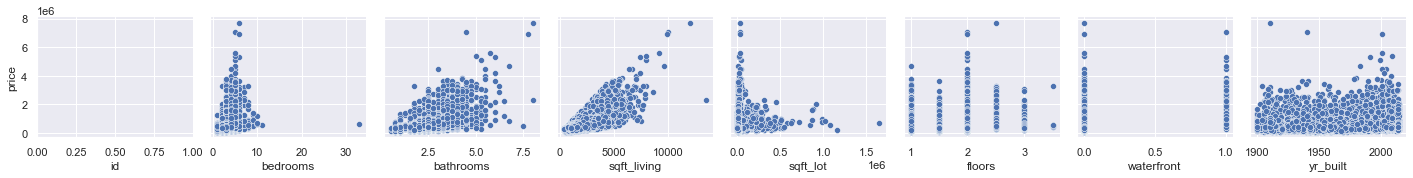

In [519]:
sns.pairplot(df_dropped_cols, x_vars=list(X.columns), y_vars='price')

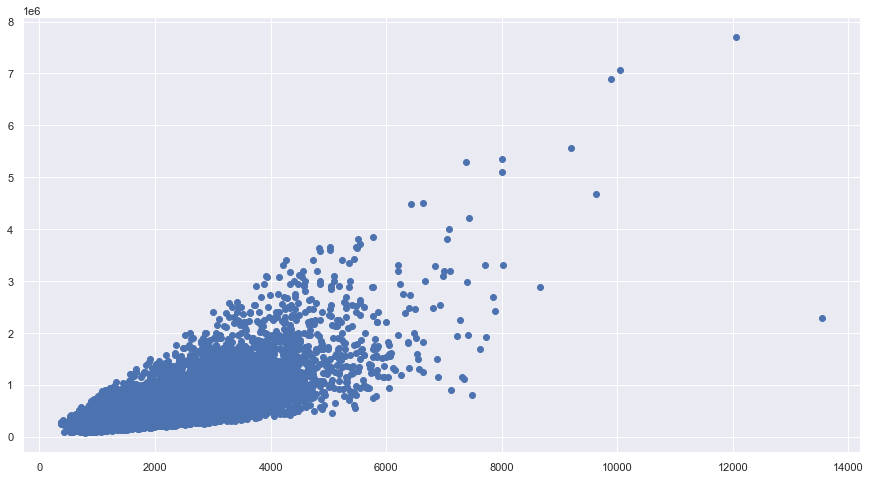

In [520]:
X1 = X['sqft_living']
plt.scatter(X1,y)

In [521]:
X1

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

In [522]:
formula = 'price~sqft_living'
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Nov 2021   Prob (F-statistic):               0.00
Time:                        13:14:05   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [523]:
lr = LinearRegression()
lr.fit(X_train[['sqft_living']], y_train)
print('Regression score for training:', lr.score(X_train[['sqft_living']], y_train))
print('Regression score for test:', lr.score(X_test[['sqft_living']], y_test))

y_pred = model.predict(X_test[['sqft_living']])
actual = y_test
predicted = y_pred
mse = metrics.mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
print('Our root mean squared error is:' , rmse)

Regression score for training: 0.4945445156766466
Regression score for test: 0.48733518973535617
Our root mean squared error is: 279226.71148541407


In [524]:
df_dropped_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              21597 non-null  int64  
 1   price           21597 non-null  float64
 2   bedrooms        21597 non-null  int64  
 3   bathrooms       21597 non-null  float64
 4   sqft_living     21597 non-null  int64  
 5   sqft_lot        21597 non-null  int64  
 6   floors          21597 non-null  float64
 7   waterfront      21597 non-null  int64  
 8   yr_built        21597 non-null  int64  
 9   VeryGoodGrade   21597 non-null  float64
 10  ExcellentGrade  21597 non-null  float64
 11  LuxurGrade      21597 non-null  float64
 12  MansionGrade    21597 non-null  float64
 13  PoorGrade       21597 non-null  float64
 14  LowGrade        21597 non-null  float64
 15  FairGrade       21597 non-null  float64
 16  LowAvgGrade     21597 non-null  float64
 17  GoodGrade       21597 non-null 

In [525]:
kc_corrs = df.corr()['log_price'].map(abs).sort_values(ascending=False)

KeyError: 'log_price'

In [ ]:
kc_corrs

In [ ]:
df['log_price'].plot.hist()

In [ ]:
df.plot.bar(df['month_sold'], df['log_price'])

In [ ]:
df['sqft_living'].describe()